<a href="https://colab.research.google.com/github/EnesS87/PyRosetta-T-rk-e-E-itim-Rehberi-1/blob/main/Pyrosetta_Tutorial_EnesSivri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gerekli Kütüphaneleri İndirip Kuruyoruz

In [ ]:
!pip install pyrosettacolabsetup py3dmol git+https://github.com/RosettaCommons/pyrosetta_viewer3d.git
!pip install py3Dmol nglview # görselleştirme için

  Cloning https://github.com/RosettaCommons/pyrosetta_viewer3d.git to /tmp/pip-req-build-8tyavswb
  Running command git clone --filter=blob:none --quiet https://github.com/RosettaCommons/pyrosetta_viewer3d.git /tmp/pip-req-build-8tyavswb
  Resolved https://github.com/RosettaCommons/pyrosetta_viewer3d.git to commit f467481e8c8cd567fbc2620173e008814b731d72
  Preparing metadata (setup.py) ... done


In [ ]:
import pyrosettacolabsetup; pyrosettacolabsetup.install_pyrosetta()

Mounted at /content/google_drive

Note that USE OF PyRosetta FOR COMMERCIAL PURPOSES REQUIRE PURCHASE OF A LICENSE.
See https://github.com/RosettaCommons/rosetta/blob/main/LICENSE.md or email license@uw.edu for details.

Looking for compatible PyRosetta wheel file at google-drive/PyRosetta/colab.bin//wheels...
Found compatible wheel: /content/google_drive/MyDrive/PyRosetta/colab.bin/wheels//content/google_drive/MyDrive/PyRosetta/colab.bin/wheels/pyrosetta-2024.19+release.a34b73c40f-cp310-cp310-linux_x86_64.whl




In [ ]:
import pyrosetta; # import the pyrosetta package to access functionality
import pyrosetta.distributed.io as io
pyrosetta.init() # must be called before any other pyrosetta functions. Can accept command line flags

┌──────────────────────────────────────────────────────────────────────────────┐
│                                 PyRosetta-4                                  │
│              Created in JHU by Sergey Lyskov and PyRosetta Team              │
│              (C) Copyright Rosetta Commons Member Institutions               │
│                                                                              │
│ NOTE: USE OF PyRosetta FOR COMMERCIAL PURPOSES REQUIRE PURCHASE OF A LICENSE │
│         See LICENSE.PyRosetta.md or email license@uw.edu for details         │
└──────────────────────────────────────────────────────────────────────────────┘
PyRosetta-4 2024 [Rosetta PyRosetta4.MinSizeRel.python310.ubuntu 2024.19+release.a34b73c40fe9c61558d566d6a63f803cfb15a4fc 2024-05-02T16:22:03] retrieved from: http://www.pyrosetta.org
core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: PyRosetta4.MinSizeRel.python310.ubuntu r381 2024.19+release.a34b73c40f a34b

***

## Info

PyRosetta'da "pose", protein veya diğer biyomoleküllerin üç boyutlu yapısını ve bu yapıyla ilgili bilgileri temsil eden temel veri yapısıdır. Pose, bir protein yapısını atomik detayda modellemek için kullanılır ve Rosetta yazılımında birçok işlemi gerçekleştirmek için merkezi bir rol oynar.

***

In [ ]:
#Helper Functions

#1

def view_single(pose):
    import py3Dmol
    import pyrosetta.distributed.io as io

    # Pose'u PDB formatında al
    pdb_string = io.to_pdbstring(pose)

    # 3D görselleştirme oluştur
    view = py3Dmol.view(width=800, height=600)
    view.addModel(pdb_string, 'pdb')
    view.setStyle({'stick': {}})
    view.zoomTo()
    view.show()

    return None


## Helper Function 1'in açıklaması:

bu kod Pyrosetta'da oluşturulan bir 'pose' nesnesinin 3D görselleştirilmesini sağlayan bir fonksiyonu tanımlar.

***import py3Dmol***:

* bu modül 3D protein yapılarının görselleştirilmesi için kullanılır.

***import pyrosetta.distributes.io as io***:

* Pyrosetta'nın PDB (Protein Data Bank) formatında dosya girdisi ve çıkışını kolaylaştıran IO araçlarını içe aktarır.

***pdb_string = io.to_pdbstring(pose)***

* fonksiyonu, pose nesnesini PDB (Protein Data Bank) formatında bir stringe dönüştürür. Bu protein yapısının PDB formatında temsil edilmesini sağlar.

***pose***:

* Pyrosetta'da oluşturulan bir protein yapısını temsil eden bir argümandır.


***view = py3Dmol.view(width=800, height=600)***:

* 3D görselleştirme penceresi oluşturur, genişlik yükseklik ayarı.

***view.addModel(pdb_string, 'pdb')***

* fonksiyonu, PDB formatındaki stringi modele ekler. Bu, protenin yapısının 3D görselleştirmede gösterilmesini sağlar.

***view.setStyle({'stick': {}})***

* bu fonksiyon, modeli stick stili ile gösterir. Bu stil, atomlar ve bağları çubuklarla temsil eder.

***view.zoomTo()***:

* Görüntüyü modelin tamamını gösterecek şekilde yakınlaştırır.

***view.show()***:

* Görselleştirme penceresini gösterir.














***

In [ ]:
#Helper Functions

#2

def compare_poses(pose1, pose2):
  import py3Dmol
  import pyrosetta.distributed.io as io
  view = py3Dmol.view(width=500, height=500)
  view.addModel(io.to_pdbstring(pose1),'pdb')
  view.addModel(io.to_pdbstring(pose2),'pdb')
  view.setStyle({'model':0}, {'cartoon': {'color': 'orange'}})
  view.addStyle({'model':0}, {"stick": {'color': 'orange'}})
  view.addStyle({'model':1}, {'cartoon': {'color': 'blue'}})
  view.addStyle({'model':1}, {'cartoon': {'color': 'blue'}})
  view.zoomTo()
  view.show()
  return None

## Helper Function 2'nin Açıklaması:


Bu kod, PyRosetta'da oluşturulan iki farklı 'pose' nesnesinin 3D görselleştirilmesini ve karşılaştırılmasını sağlayan bir fonksiyonu tanımlar.

***view.setStyle({'model':0}, {'cartoon': {'color': 'orange'}}):***

* İlk modeli karikatür stilinde ve turuncu renkte gösterir. Bu stil, proteinlerin omurgasını görselleştirmek için yaygın olarak kullanılır.

***view.addStyle({'model':0}, {"stick": {'color': 'orange'}}):***

* İlk model için atomlar ve bağlar için turuncu çubuk stilini ekler. Bu, protein yapısındaki atomları ve bağları daha ayrıntılı olarak görselleştirmek için kullanılır.

***view.addStyle({'model':1}, {'cartoon': {'color': 'blue'}}):***

* İkinci modeli karikatür stilinde ve mavi renkte gösterir.

***view.addStyle({'model':1}, {'stick': {'color': 'blue'}}):***

* İkinci model için atomlar ve bağlar için mavi çubuk stilini ekler.

***

In [ ]:
import py3Dmol
import nglview as nv
from pyrosetta import *

pose = pyrosetta.pose_from_sequence('TESTTHISEPICLIFE')

# Pose bilgisini yazdır
print(f"Number of residues: {pose.total_residue()}")
print(f"Sequence: {pose.sequence()}")

# Pose'u görselleştirme
pose.dump_pdb('pose.pdb')

with open('pose.pdb', 'r') as f:
    pdb_content = f.read()

view = py3Dmol.view(width=800, height=600)
view.addModel(pdb_content, 'pdb')
view.setStyle({'stick': {}})
view.zoomTo()
view.show()


core.chemical.GlobalResidueTypeSet: Finished initializing fa_standard residue type set.  Created 985 residue types
core.chemical.GlobalResidueTypeSet: Total time to initialize 1.13372 seconds.
Number of residues: 16
Sequence: TESTTHISEPICLIFE


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

## Kod açıklaması

***pose_from_sequence:***

* bu fonksiyon verilen amino asit dizisinden bir Pose yani protein yapısı oluşturur.

***pose.total_residue():***

* pose'daki toplan residue sayısını verir

***pose.sequence():***

* pose'daki amino asit dizisini verir.

***pose.dump_pdb('pose.pdb'):***

* bu fonksiyon pose'u pose.pdb dosyasına kaydeder.

***with open('pose.pdb', 'r') as f:***
  ***pdb_content = f.read():***

* bu kod, PDB dosyasını açar ve içeriğini pdb_content değişkenine okur.

***view= py3Dmol.view(width=800, height=600):***

* fonksiyonu, 800x600 boyutlarında bir py3Dmol görünümü oluşturur.

***view.addModel(pdb_content, 'pdb'):***

* bu fonksiyon PDB içeriğini modele ekler.

***view.setStyle({'stick': {}}):***

* modeli stick stili ile gösterir.





***


In [ ]:
res = pose.residue(2)
#Get name
print(res.name())
#Get properties
print(res.is_charged())

GLU
True


## Kod Açıklaması

Pose'daki belirli bir residue hakkında bilgi almak için kullanılır.

***res = pose.residue(2):***

* bu foksiyonda, Pose'daki ikinci residue'yü seçer ve res değişkenine atar.

***res.is_charged():***

* residue'nün elektrik yüklü olup olmadığını kontrol eder, bu örnekte eğer yüklü ise True döndürür.

## Info:

Amino asitler pH seviyesine bağlı olarak pozitif, negatif veya nötr yük taşıyabilirler. Bu elektriksel yükler, proteinlerin yapısını, fonksiyonunu ve etkileşimini etkileyebilir.

**Yüklü amino asitler:**


*Pozitif yüklü (bazik) amino asitler:*

*   Lysine (Lys, K)
*   Arginine (Arg, R)
*   Histidine (His, H)(*)

*Negatif yüklü (asidik) amino asitler:*

*  Aspartic Acid (Asp, D)
*  Glutamic Acid (Glu, E)


Yüklü residue'lar proteinlerin yüzeyinde veya aktif bölgelerinde bulunarak, diğer moleküllerle etkileşimde önemli rol oynayabilirler.

Eğer bir residue yüklü ise, bu özellik proteinlerin çözünürlüğü, stabilitesi ve etkileşimleri gibi birçok biyokimyasal ve biyofiziksel özellikte önemli rol oynar.

***


In [ ]:
print(res.is_protein())

True


## Kod Açıklaması:

PyRosetta'da residue türleri hakkında bilgi almak için kullanılan çeşitli yöntemler ve özellikler bulunmaktadır.

***print(res.is_protein()):***

* bir protein olup olmadığını kontrol eder, sonucu ise True veya False olarak verir.

* ***print(res.is_RNA())***
* ***print(res.is_DNA())***
* ***print(res.is_peptoid())***
* ***print(res.is_carbohydrate())***
* ***print(res.is_ligand())***

***

In [ ]:
import numpy as np

atom = res.atom('CA')
np.array(atom.xyz())

array([3.98758299e+00, 2.83850887e+00, 1.11975102e-17])

In [ ]:
vec = res.atom('CA').xyz()-res.atom('CB').xyz()
print(vec.norm())

1.5303190000000002


## Kod Açıklaması:

bu kod ile bir residue'daki bir atomun koordinatlarını alırız ve bu koordinatları bir Numpy dizisine dönüştürür.

***res.atom('CA'):***

* seçilen residue'nun CA atomunu döndürür. 'CA', carbon alfa atomunu temsil eder ve genellikle proteinlerin omurgasında bulunur.

***np.array(atom.xyz()):***

* bu fonksiyon, koordinatları bir numpy dizisine dönüştürür. NumPy, bilimsel hesaplamalar için yaygın kullanılan bir Python kütüphanesidir.

***ca_xyz = res.atom('CA').xyz()***
***cb_xyz = res.atom('CB').xyz()***

* CA (alfa carbon) ve CB (beta carbon) atomları, genellikle ptorein residue'larının omurgasında ve yan zincirlerinde bulunur.

***vec = ca_xyz - cb_xyz***

* bu adım, CA ve CB atomları arasıdanki vektörü hesaplar.

***vec.norm()***

* vektörün normunu ve büyüklüğünü hesaplar. Bu norm, iki atom arasındaki öklidyen mesafeyi temsil eder.

***


In [ ]:
print("phi:", pose.phi(2))
print("psi:", pose.psi(2))
print("chi:", pose.chi(chino=1, seqpos=2))
print()

res = pose.residue(2)
num_chi = len(res.chi_atoms())
for i in range(1, num_chi+1):
  print(f"chi{i}: {res.chi(i):.2f} deg")

phi: 180.0
psi: 180.0
chi: -1.3000000024450742e-05

chi1: -0.00 deg
chi2: -0.00 deg
chi3: -0.00 deg


## Kod Açıklaması:

Belirli bir residue'nün dihedral açılarını (phi, psi ve chi) yazdırır. Bu açılar protein yapılarının 3 boyutlu conformation'larını anlamak için için önemlidir.

***pose.phi(2)***

* pose'daki ikinci kalıntının phi dihedral açısını alır. Phi açısı, N-Cα bağının etrafındaki döngüyü temsil eder.

***pose.psi(2)***

* pose'daki ikinci kalıntının psi dihedral açısını alır. Psi açısı, Cα-C bağının etrafındaki döngüyü temsil eder.

***pose.chi(chino=1, seqpos=2)***

* pose'daki ikinci residue'nün birinci dihedral açısını döndürür. Chi açısı, yan zincir döngüsünü temsil eder ve bu değer dereceler cinsindendir.

***num_chi = len(res.chi_atoms())***

* seçilen residue'nün chi açılarını hesaplamak için kullanılan atom gruplarının sayısını döndürür.

***{res.chi(i):.2f}***

* belirli bir chi açısı döndürülür ve :.2f ifadesi ile değeri iki ondalık basamağa yuvarlar.

***

In [ ]:
pose.set_phi(seqpos=6, setting=90)
pose.set_phi(seqpos=15, setting=90)
view_single(pose)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

## Kod Açıklaması

Rosetta yazılımını kullanarak protein yapısının belirli kalıntılarındaki phi açılarını değiştirmek ve ardından bu değişiklikleri görselleştirmek için kullanılır.

***pose.set_phi(seqpos=6, setting=90)***

* pose nesnesindeki 6 numaralı kalıntının phi açısını 90 derece olarak ayarlar.

***

In [ ]:
from rosetta.core.scoring import CA_rmsd
pose_helix = pose.clone()
for i in range (1, pose_helix.total_residue()+1):
  pose_helix.set_phi(seqpos=i, setting= -60)
  pose_helix.set_psi(seqpos=i, setting= -50)

view_single(pose_helix)


<ipython-input-14-513aa902aa86>:1: UserWarning: Import of 'rosetta' as a top-level module is deprecated and may be removed in 2018, import via 'pyrosetta.rosetta'.
  from rosetta.core.scoring import CA_rmsd


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

## Kod Açıklaması

Bir pose nesnesindeki tüm kalıntıların phi ve psi dihedral açılarını belirli değerlere ayarlayarak bir alfa helix yapısı oluşturur ve ardından bu yapıyı py3Dmol kullanarak görselleştirir.

***CA_rmsd***

* İki protein yapısının alfa carbon atomlarının kök ortalama kare sapmasını (RMSD) hesaplamak için kullanılan bir fonksiyondur. Burada bu özellik kullanılmamıştır.

***pose_helix = pose.clone()***

* pose.clone() fonksiyonu mevcut pose nesnesinin bir kopyasını oluşturur ve bu kopyayı pose_helix değişkenine atar. Bu orjinal pose nesnesinin değişmeden kalmasını sağlar.

***for i in range(1, pose_helix.total_residue() + 1)***

* tüm kalıntılar üzerinde iterasyon yapar.

***pose.set_phi(seqpos=i, setting=-60)***

* her residue'nün phi açısını -60 derece olarak ayarlar

***pose.set_psi(seqpos=i, setting=-50)***

* her bir residue'nün psi açısını -50 derece olarak ayarlar.

### ! Bu açı değerleri alfa heliks yapısının karakteristik phi ve psi açılarıdır.



***

In [ ]:
from pyrosetta.toolbox import mutate_residue

mutate_residue(pose, mutant_position=5, mutant_aa='K')
print(pose.sequence)
view_single(pose)

core.scoring.ScoreFunctionFactory: SCOREFUNCTION: ref2015
core.scoring.etable: Starting energy table calculation
core.scoring.etable: smooth_etable: changing atr/rep split to bottom of energy well
core.scoring.etable: smooth_etable: spline smoothing lj etables (maxdis = 6)
core.scoring.etable: smooth_etable: spline smoothing solvation etables (max_dis = 6)
core.scoring.etable: Finished calculating energy tables.
basic.io.database: Database file opened: scoring/score_functions/hbonds/ref2015_params/HBPoly1D.csv
basic.io.database: Database file opened: scoring/score_functions/hbonds/ref2015_params/HBFadeIntervals.csv
basic.io.database: Database file opened: scoring/score_functions/hbonds/ref2015_params/HBEval.csv
basic.io.database: Database file opened: scoring/score_functions/hbonds/ref2015_params/DonStrength.csv
basic.io.database: Database file opened: scoring/score_functions/hbonds/ref2015_params/AccStrength.csv
basic.io.database: Database file opened: scoring/score_functions/rama/fd/

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

## Kod Açıklaması

***mutate_residue***

* Bir pose nesnesindeki belirli bir residue'yü başka bir amino asit ile değiştirmek için kullanılır.

***mutant_position=5***

* değiştirilmesi gereken kalıntını pozisyonunu belirtir.

***mutant_aa= 'K'***

* yeni amino asit dizisinin K olduğunu belirtir.


***

In [ ]:
from pyrosetta.rosetta.core.scoring import CA_rmsd
pose1 = pose.clone()

# şuan iki pose da aynı, bu yüzden RMSD eşittir 0

print(CA_rmsd(pose,pose1))

#biraz değişiklik yapacağız

pose1.set_phi(5,90)
print(CA_rmsd(pose,pose1))
compare_poses(pose,pose1)

0.0
1.1175036430358887


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

## Kod Açıklaması

***print(CA_rmsd(pose,pose1))***

* bu fonksiyon pose ve pose1 arasındaki RMSD değerini hesaplar.

***pose1.set_phi(5,90)***

* pose1 nesnesinin 5. pozisyonundaki kalıntının phi dihedral açısını 90 derece olarak ayarlar.

***compare_poses(pose, pose1)***

* bu fonksiyon pose ve pose1 i karşılaştırır. iki pose nesnesi arasındaki farkları görsel olarak incelemek için kullanılır.

***

In [ ]:
from pyrosetta.toolbox import cleanATOM

In [ ]:
!wget https://files.rcsb.org/download/8J20.pdb
cleanATOM("8J20.pdb")

--2024-06-12 10:53:13--  https://files.rcsb.org/download/8J20.pdb
Resolving files.rcsb.org (files.rcsb.org)... 132.249.213.193
Connecting to files.rcsb.org (files.rcsb.org)|132.249.213.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘8J20.pdb’

8J20.pdb                [ <=>                ] 767.44K  --.-KB/s    in 0.1s    

2024-06-12 10:53:13 (6.68 MB/s) - ‘8J20.pdb’ saved [785862]



In [ ]:
pose123 = pose_from_pdb("8J20.clean.pdb")
view_single(pose123)

core.import_pose.import_pose: File '8J20.clean.pdb' automatically determined to be of type PDB
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OXT on residue SER:CtermProteinFull 340
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OXT on residue GLU:CtermProteinFull 571
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OXT on residue PHE:CtermProteinFull 794
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OXT on residue ARG:CtermProteinFull 1068
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OXT on residue PHE:CtermProteinFull 1125
core.conformation.Conformation: Found disulfide between residues 361 435
core.conformation.Conformation: Found disulfide between residues 484 554
core.conformation.Conformation: Found disulfide between residues 870 945


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

## Kod Açıklaması

***!wget***

* bu komut, belirlenen URL'den PDB dosyasını indirmek için kullanılır.

***https://files.rcsb.org/download/8J20.pdb***

* Bu URL 8J20 PDB dosyasını indirir.

!!! Şimdi burada istediğimiz proteini nasıl indirebiliriz:

* 1- Protein Data Bank'ın sitesine gidin
* 2- istediğiniz proteini orada bulun, adını yazıp aratarak vs.
* 3- proteini bulduğunuzda orada 4 harften oluşan proteine özgü kod var, onu bu linkin son kısmındali 8J20.pdb yazarak indirebilirsiniz
* 4- 8J20 de GPR41'e ait zaten








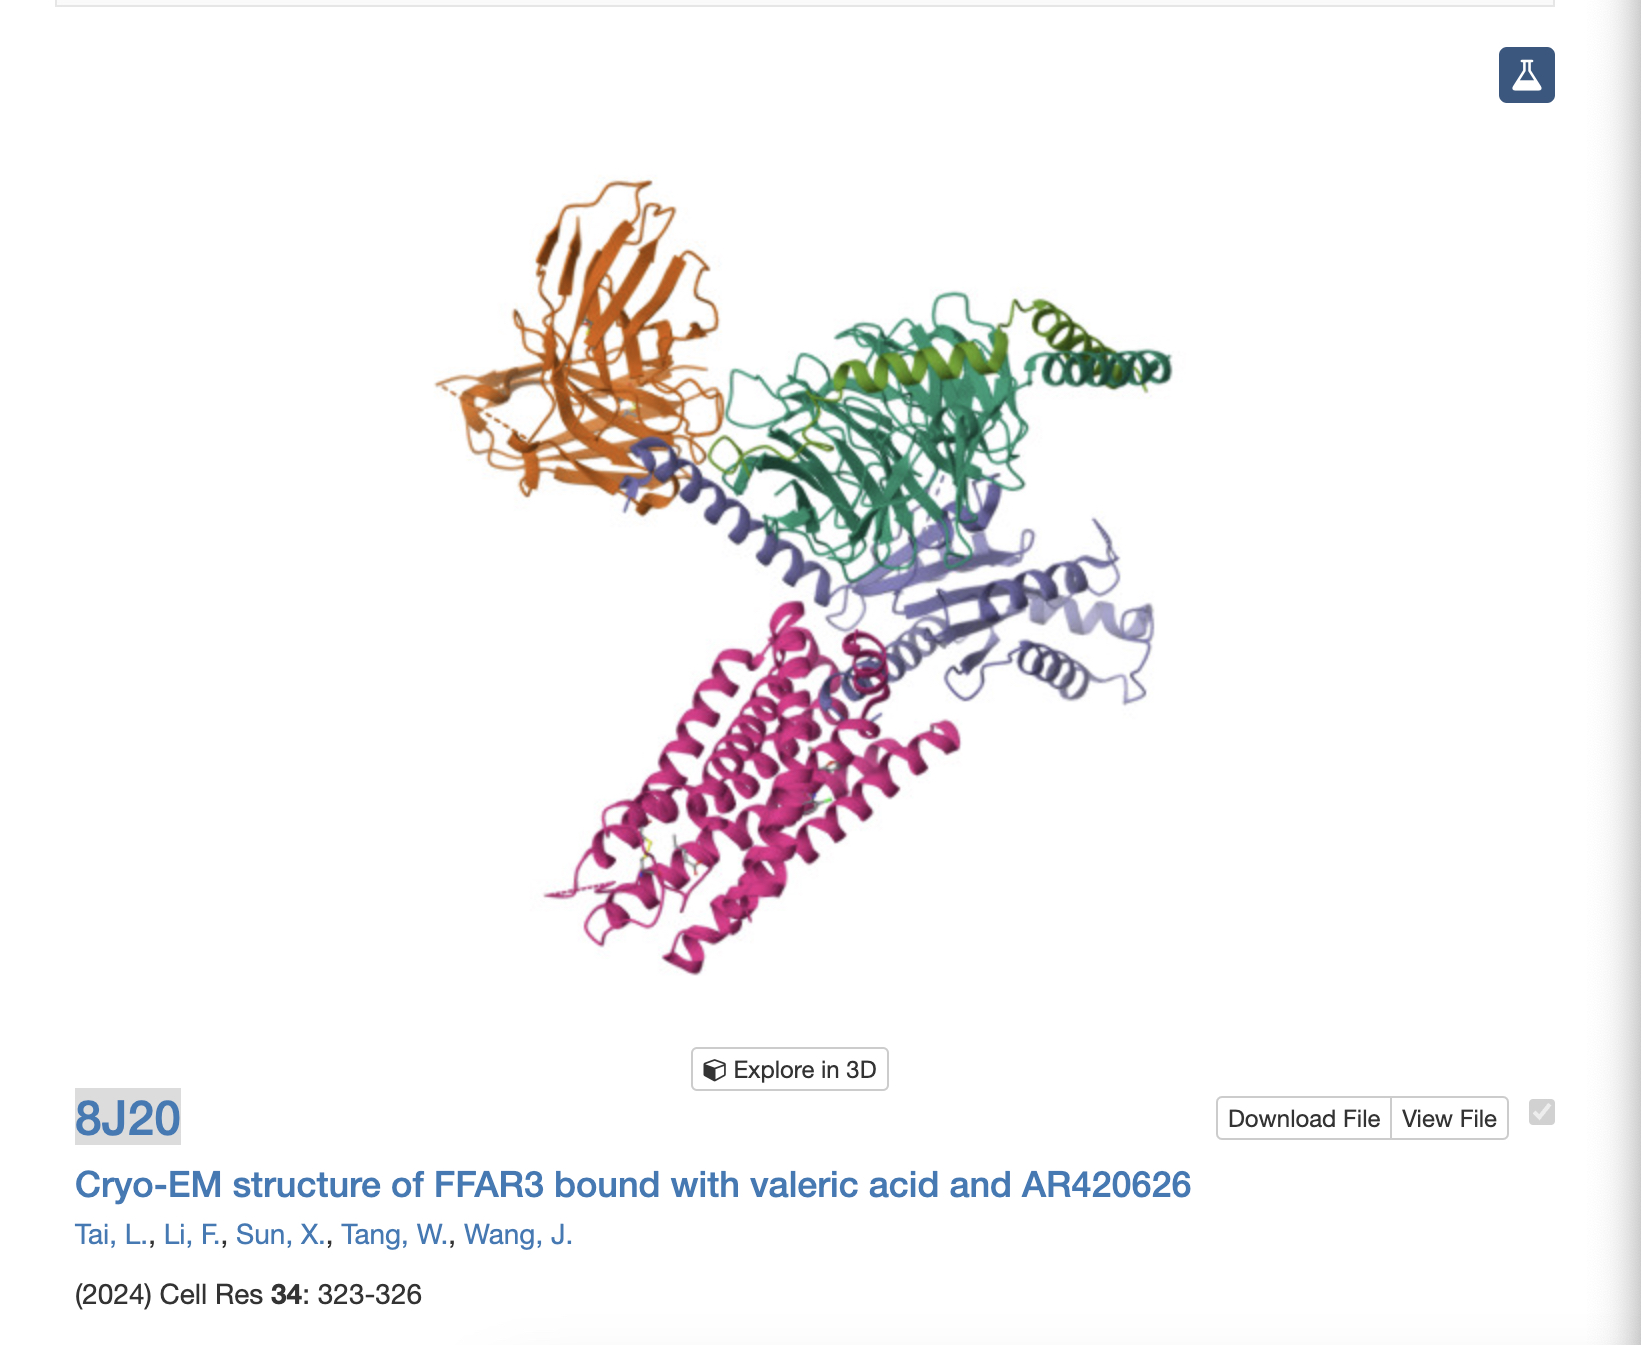

***cleanATOM("8J20.pdb")***

* 8J20.pdb dosyasını temizler. Bu işlem yalnızca 'ATOM' ve 'TER' kayıtlarını tutar, diğer tüm kayırları kaldırır. Temizlenmiş dosya 8J20.clean.pdb adıyla kaydedilir.

***pose123 = pose_from_pdb("8J20.clean.pdb")***

* Temizlenmiş PDB dosyasını yükler ve bir pose nesnesi oluşturur. view_single fonksiyonu pose şeklindeki dosyaları görüntüleyebilmektedir.
Eğer clean işlemi olmazsa dosyayı okuyamaz ve görsel bir çıktı alınamaz.

***

In [ ]:
!wget https://files.rcsb.org/download/1atp.pdb1

from pyrosetta.toolbox import cleanATOM
cleanATOM("1atp.pdb1")

--2024-06-12 10:53:16--  https://files.rcsb.org/download/1atp.pdb1
Resolving files.rcsb.org (files.rcsb.org)... 132.249.213.193
Connecting to files.rcsb.org (files.rcsb.org)|132.249.213.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘1atp.pdb1’

1atp.pdb1               [ <=>                ] 255.42K  --.-KB/s    in 0.08s   

2024-06-12 10:53:16 (3.27 MB/s) - ‘1atp.pdb1’ saved [261549]



In [ ]:
!wget https://files.rcsb.org/download/1atp.pdb1

pose = pyrosetta.pose_from_pdb('/content/1atp.pdb1')
pose_clean = pyrosetta.pose_from_pdb('/content/1atp.clean.pdb')

print(f"Pose has {pose.total_residue()} residues")
print(f"Clean pose has {pose_clean.total_residue()} residues ")


--2024-06-12 10:53:17--  https://files.rcsb.org/download/1atp.pdb1
Resolving files.rcsb.org (files.rcsb.org)... 132.249.213.193
Connecting to files.rcsb.org (files.rcsb.org)|132.249.213.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘1atp.pdb1.1’

1atp.pdb1.1             [ <=>                ] 255.42K  --.-KB/s    in 0.07s   

2024-06-12 10:53:17 (3.36 MB/s) - ‘1atp.pdb1.1’ saved [261549]

core.import_pose.import_pose: File '/content/1atp.pdb1' automatically determined to be of type PDB
core.io.pose_from_sfr.PoseFromSFRBuilder: [ WARNING ] ATP339 has an unfavorable ring conformation; the coordinates for this input structure may have been poorly assigned.
core.import_pose.import_pose: File '/content/1atp.clean.pdb' automatically determined to be of type PDB
Pose has 359 residues
Clean pose has 354 residues 


## Kod Açıklaması

1atp.pdb1 adlı PDB dosyasını indiriyor ve sonra onu cleanATOM ile istenilen forma getiriyor.

indirilen PDB dosyasını pose nesnesine yüklüyor. pose değişkeni 1atp.pdb1 dosyasının protein yapısını temsil ederken pose_clean değişkeni temizlenmiş protein yapısını temsil eder.

***print(f"Pose has {pose.total_residue()} residues")***

***print(f"Clean pose has {pose_clean.total_residue()} residues")***

* bu satırlar her iki pose nesnesindeki toplam residue sayısını yazdırır.



***

In [ ]:
print(pose.pdb_info().pose2pdb(1))

print(pose.pdb_info().pdb2pose('E', 224))

15 E 
210


## Kod Açıklaması

PDB (Protein Data Bank) dosyaları proteinlerin 3 boyutlu yapısını ve atomların konumlarını içeren dosyalardır. Bu dosyalar, protein yapısını zincirler ve residue'lar halinde organize eder.

***print(pose.pdb_info().pose2pdb(1))***

* Bu satır pose nesnesinin birinci kalıntısının PDB dosyasındaki konumunu yazdırır. Örneğin çıktı A10 olabilir ya da buradaki gibi 15 E. Bu şu anlama gelir:
* A: Zincir A
* 10: Zincir A'daki 10 numaralı residue

***print(pose.pdb_info().pdb2pose('E', 224))***

* PDB dosyasındaki E zincirinin 224 numaralı residue'sünün Rosetta'daki pose nesnesindeki karşılık gelen pozisyonu verir. Örneğin çıktı 50 olabilir ya da buradaki gibi 210.

* E: Zincir E

* 224: Zincir E'deki 224 numaralı residue
* 210: Rosetta'daki pose nesnesindeki 50. residue


***

In [ ]:
N_res = pose.residue(1)
C_res = pose.residue(pose.total_residue())
dist_vec = C_res.atom('CA').xyz() - N_res.atom('CA').xyz()
dist_vec.norm()

38.98994688378018

## Kod Açıklaması

Bu kod ile protein yapısının iki belirli atomu arasındaki mesafeyi hesaplayabiliriz.

***N_res = pose.residue(1)***

* pose nesnesindeki birinci residue'yü alır. Bu, protein zincirindeki ilk amino asit residue'sünü temsil eder ve N_res değişkenine atanır.

***C_res = pose.residue(pose.total_residue())***

* pose nesnesindeki son residue'yü alır. Çünkü pose.total_residue() fonksiyonu toplam residue sayısını temsil eder ve bu sayede son residue elde edilir.

***dist_vec = C_res.atom('CA').xyz() - N_res.atom('CA').xyz()***

* N_res residue'sindeki CA (alfa karbon) atomunun 3 boyutlu uzaydaki konumunu alır

* C_res resideu'sindeki CA atomunun 3 boyutlu uzaydaki koordinatlarını da aynı şekilde alır.

***dist_vec***

* Bu iki koordinat arasındaki fark bu değişkene atanır.

***dist_vec.norm()***

* dist_vex vektörünün normunu (vektörün büyüklüğünü veya uzunluğunu) hesaplar. Bu iki CA atomu arasındaki Öklidyen mesafeyi verir.

***

In [ ]:
for i in range(1, pose_clean.total_residue()):
  psi = pose_clean.psi(i)
  phi = pose_clean.phi(i)
  print(f'psi: {psi} and phi: {phi}')

psi: -64.60408981512994 and phi: 0.0
psi: -38.18968330027007 and phi: -50.70118221541277
psi: -62.00369777951885 and phi: -53.50895679188792
psi: -60.69278169952343 and phi: -50.439435265948816
psi: -39.101201302836266 and phi: -47.33517994361168
psi: -57.86486999045841 and phi: -50.723462799960956
psi: -36.397267183985946 and phi: -60.751153726852394
psi: -43.49945795431238 and phi: -62.27380811632314
psi: -41.44282684960903 and phi: -52.1683598015393
psi: -46.10623377888059 and phi: -62.145441004612344
psi: -65.0544778822031 and phi: -50.18889442603632
psi: -56.1267167808697 and phi: -41.10329402625136
psi: -52.45442565558101 and phi: -51.313502247007264
psi: -45.53773435638182 and phi: -54.32703373442787
psi: -36.76071170823328 and phi: -70.33738799214775
psi: -49.13408201943402 and phi: -54.32641837166442
psi: -39.41974171795897 and phi: -65.6602008655832
psi: 76.50868440485402 and phi: -127.22884176496869
psi: 147.49967485716607 and phi: -69.58430378435955
psi: 149.56298705397424 

## Kod Açıklaması

bu kod protein yapısının her residue'sünün psi ve phi açılarını hesaplar ve yazdırır. Bu açıların hesaplanması, protein secondary structure'ının (alfa helix, beta sheet) belirlenmesinde kritik öneme sahiptir.

***for i in range(1, pose_clean.total_residue()):***

* bu satır pose_clean'deki tüm residue'lar üzerinde gezinmek için bir for döngüsü başlatır.

***psi = pose_clean.psi(i)***

* pose_clean nesnesindeki i numaralı residue'nün psi açısını hesaplar.

***phi = pose_clean.phi(i)***

* pose clean nesnesindeki i numaralı residue'nün phi açısını hesaplar.


# Info

## Protein Yapısının Temel Bileşenleri

Proteinler, amino asitlerin polipeptid zincirleri halinde birleşmesinden oluşur. Her amino asit kalıntısı, ana zincirde şu atomları içerir

* N: Amino grubu
* Ca: Alfa karbon atomu
* C: Karboksil grubu karbon atomu

## Torsiyon Açıları

**Phi (φ) Açısı**

Phi açıs, her bir residue'nün N-Ca bağının etrafındaki bükülme açısıdır.

* N(i): ilgili residue'nün amino grubu azot atomu
* Ca(i): İlgili residue'nün alfa carbon atomu
* C(i-1): Bir önceki residue'nün karboksil grubu karbon atomu
* N(i-1): Bir önceki residue'nün amino grubu azot atomu

**Psi (ψ) Açısı**

Psi açısı, her bir residue'nün Ca-C bağının etrafındaki bükülme açısıdır.

* Ca(i): İlgili residue'nün alfa karbon atomu
* C(i): İlgili residue'nün karboksil grubu carbon atomu
* N(i+1): Bir sonraki residue'nün amino grunu azor atomu
* Ca(i+1): Bir sonraki residue'nün alfa karbon atomu

## Özet olarak:

* Phi (φ) angle: N-Cα bond torsion
* Psi (ψ) angle: Cα-C bond torsion




***

(-180.0, 180.0)

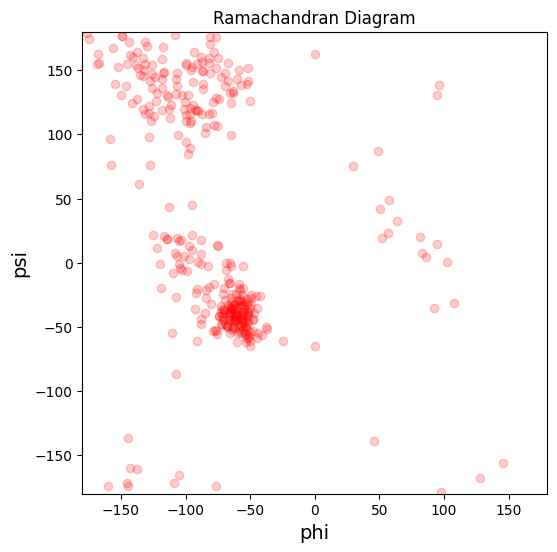

In [ ]:
import matplotlib.pyplot as plt

psi_angles = []
phi_angles = []

for res in range(1, pose_clean.total_residue()+1):
  psi_angles.append(pose_clean.psi(res))
  phi_angles.append(pose_clean.phi(res))

f, ax = plt.subplots(1,1,figsize=(6,6))
ax.scatter(phi_angles, psi_angles, color="red", alpha=0.2)
plt.title("Ramachandran Diagram")
ax.set_xlabel("phi", fontsize=14)
ax.set_ylabel("psi", fontsize=14)
ax.set_xlim(-180,180)
ax.set_ylim(-180,180)

Kod Açıklaması

Bu kod temizlenmiş protein yapısının (pose_clean) Ramachandran diyagramını oluşturur. Ramachandran diyagramı, proteinlerin secondary structure'larının belirlenmesinde önemli olan psi ve phi torsiyon açılarını görselleştirmek için kullanılır.

***psi_angles = []***
***phi_angles = []***

* psi_angles ve phi_angles adlı iki boş liste oluşturulur.

***for res in range(1, pose_clean.total_residue()+1)***

* Bu döngü birinci residue'den başlayarak pose_clean nesnesindeki toplam kalıntı sayısına kadar devam eder.

***psi_angles.append(pose_clean.psi(res))***

* her residue'nün psi açısını psi_angles listesine ekler

***phi_angles.append(pose_clean.psi(res))***

* her residue'nün phi açısını phi_angles listesine ekler.

***f, ax = plt.subplots(1, 1, figsize=(6,6)***

* 6x6 boyutlarında bir grafik oluşturur.

***ax.scatter(phi_angles, psi_angles, color="red", alpha=0.2)***

* phi açılarını x ekseninde ve psi açılarını y ekseninde kırmızı renkli, şeffaflığı %20 olan noktalar olarak dağıtır.

***ax.set_xlim(-180, 180)***

* x ekseninin sınırlarını -180 ile 180 derece arasında ayaralr

***ax.set_ylim(-180, 180)***

* y ekseninin sınırlarını -180 ile 180 derece arasında ayarlar.


***

# Ve son...

* https://github.com/EnesS87
* https://www.linkedin.com/in/enes-sivri-6a523617a/